# Used Car Sales
Discount Motors is a used car dealership in the UK. They want to lead the way in used cars.
Selling to customers who want the latest and greatest features, without the price tag of a
brand new car.
The UK Government has now announced that from 2030 all new cars will be required to be
zero emissions. Although this won’t impact the used car market, it is expected that buyers will
give more consideration to the future value of their cars. And petrol and diesel will likely have
a much lower value after 2030.
![Fig.1](used_cars.png)
## Task
Next month, our most experienced sales team member will be retiring. They have been on
the team almost since the company was founded. They are incredibly talented at
estimating the sales price of cars. We are pretty worried that when they retire, we won’t be
able to estimate as well, and that will have a considerable impact on sales.
Currently, when a new car comes in, team members take all of the information that usually
appears in the advert and give it to the team member. They then estimate the price. We
have been testing the team members estimating themselves, but they are always around
30% away from the price we know the car will sell for.
Can you help us estimate the price we should list a car for? The team's estimates are always
around 30% off; we really want to be within 10% of the price. This will mean we can automate
the whole process and be able to sell cars more quickly.

In [1]:
# for supressing warnings related to imbalanced categories
import warnings
import os
warnings.filterwarnings('ignore')
os.environ['PYTHONWARNINGS'] = 'ignore'

In [2]:
# print function for higher readability
def print_jupiter(string:str):
    """Print the inout with upper and lower boundries.""" 
    print(f"{'*'*60}\n{string}\n{'*'*60}")

# Data Information
The sales team has pulled some data from the website listings from the last 6 months. <br>
All cars listed in this data were sold at the price listed. <br>
The data has not been checked and should be validated based on the following details:<br>

| Column Name | Details |
|-------------|---------|
| model | Character, the model of the car, 18 possible values |
| year | Numeric, year of registration from 1998 to 2020 |
| price | Numeric, listed value of the car in GBP |
| transmission | Character, one of "Manual", "Automatic", "Semi-Auto", or "Other" |
| mileage | Numeric, listed mileage of the car at time of sale |
| fuelType | Character, one of "Petrol", "Hybrid", "Diesel", or "Other" |
| tax | Numeric, road tax in GBP. Calculated based on CO2 emissions or a fixed price, depending on the age of the car. |
| mpg | Numeric, miles per gallon as reported by manufacturer |
| engineSize | Numeric, listed engine size, one of 16 possible values |

In [3]:
# Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## import the date
toyota_df = pd.read_csv('toyota.csv')
toyota_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [4]:
## clean the data
toyota_df_cleaned = toyota_df.copy()

# checking data types and missing values
print_jupiter(f"type of columns:\n{toyota_df_cleaned.dtypes}")
print_jupiter(f"number of missing values in columns: \n{toyota_df_cleaned.isna().sum()}")
print_jupiter(f"shape of the data: {toyota_df_cleaned.isna().shape}")

# check the model (should have 18 distinct values)
assert toyota_df_cleaned['model'].nunique()==18
toyota_df_cleaned['model'] = toyota_df_cleaned['model'].astype('category')

# check the year column: range: 1998-2020
try:
    assert toyota_df_cleaned['year'].min() >= 1998
    assert toyota_df_cleaned['year'].max() <= 2020
except AssertionError:
    print_jupiter('Warning: there is/are out of range value(s)!')

# check the transmission column
map_transmission = ["Manual", "Automatic", "Semi-Auto", "Other"]
assert all(x in map_transmission for x in toyota_df_cleaned['transmission'].unique())
toyota_df_cleaned['transmission'] = toyota_df_cleaned['transmission'].astype('category')

# check the fuelType column
map_fuel = ["Petrol", "Hybrid", "Diesel", "Other"]
assert all(x in map_fuel for x in toyota_df_cleaned['fuelType'].unique())
toyota_df_cleaned['fuelType'] = toyota_df_cleaned['fuelType'].astype('category')

# check engineSize: range 16 possible values
try:
    assert toyota_df_cleaned['engineSize'].nunique()==16
except AssertionError:
    print_jupiter('Warning: there is/are out of range value(s)!')

************************************************************
type of columns:
model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object
************************************************************
************************************************************
number of missing values in columns: 
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64
************************************************************
************************************************************
shape of the data: (6738, 9)
************************************************************


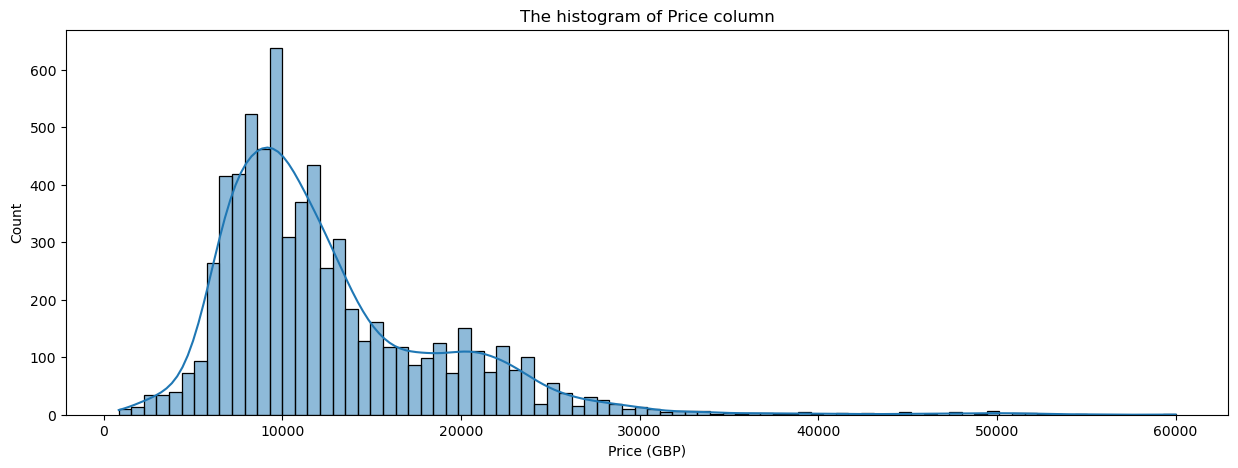

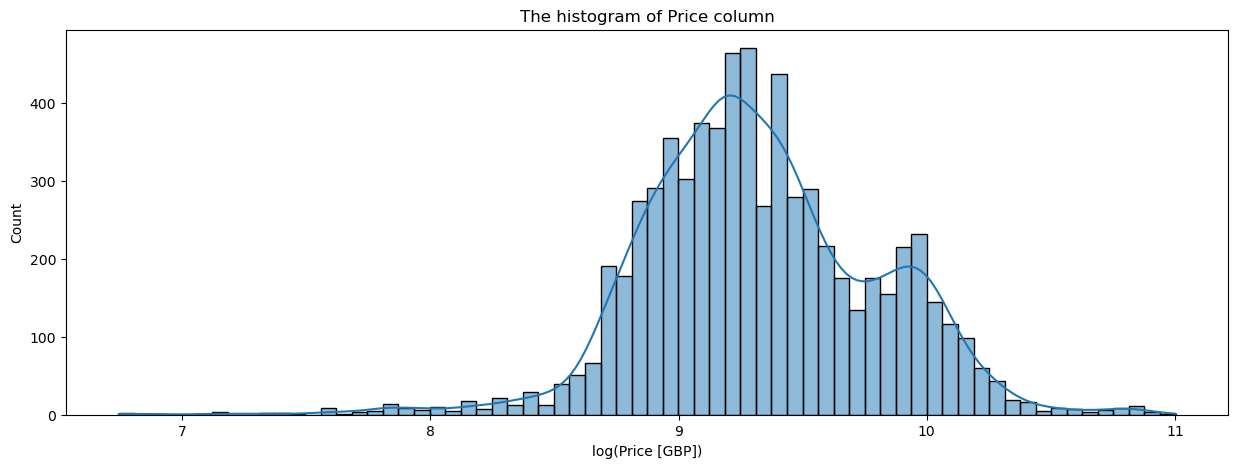

In [5]:
## visualize the price column and transformed prices
# price alone
plt.figure(figsize=(15, 5))
sns.histplot(x='price', data=toyota_df_cleaned, kde=True)
plt.title('The histogram of Price column')
plt.xlabel('Price (GBP)')
plt.show()

# price log transformed
toyota_df_cleaned['price_log'] = np.log(toyota_df_cleaned['price'])
plt.figure(figsize=(15, 5))
sns.histplot(x='price_log', data=toyota_df_cleaned, kde=True)
plt.title('The histogram of Price column')
plt.xlabel('log(Price [GBP])')
plt.show()


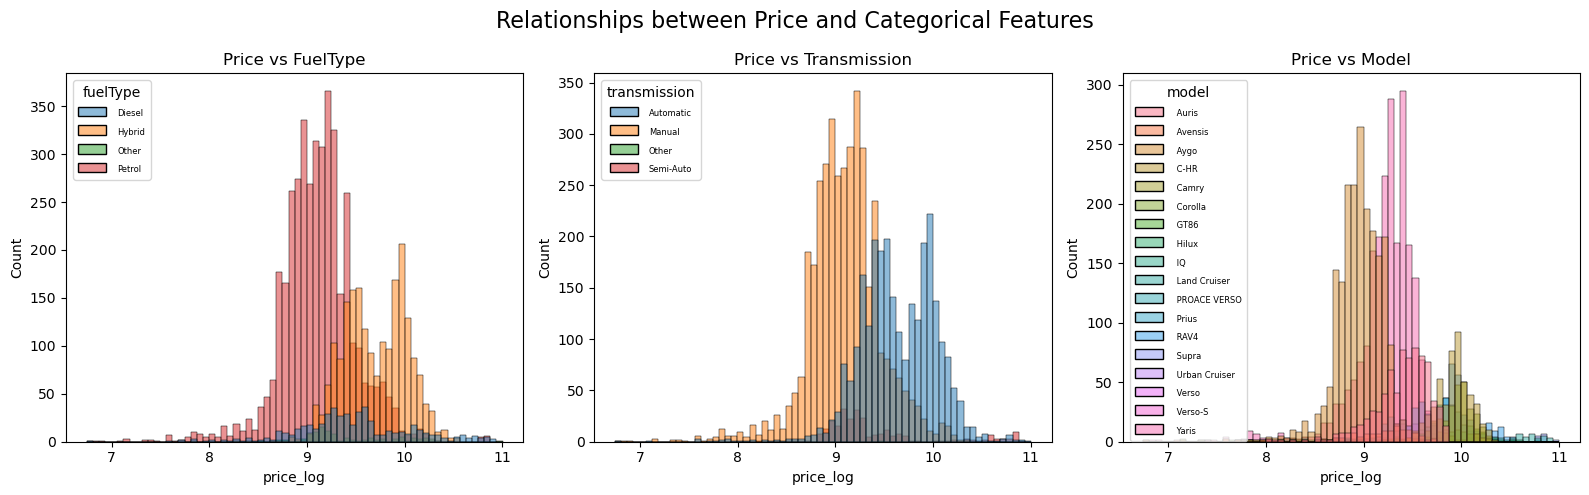

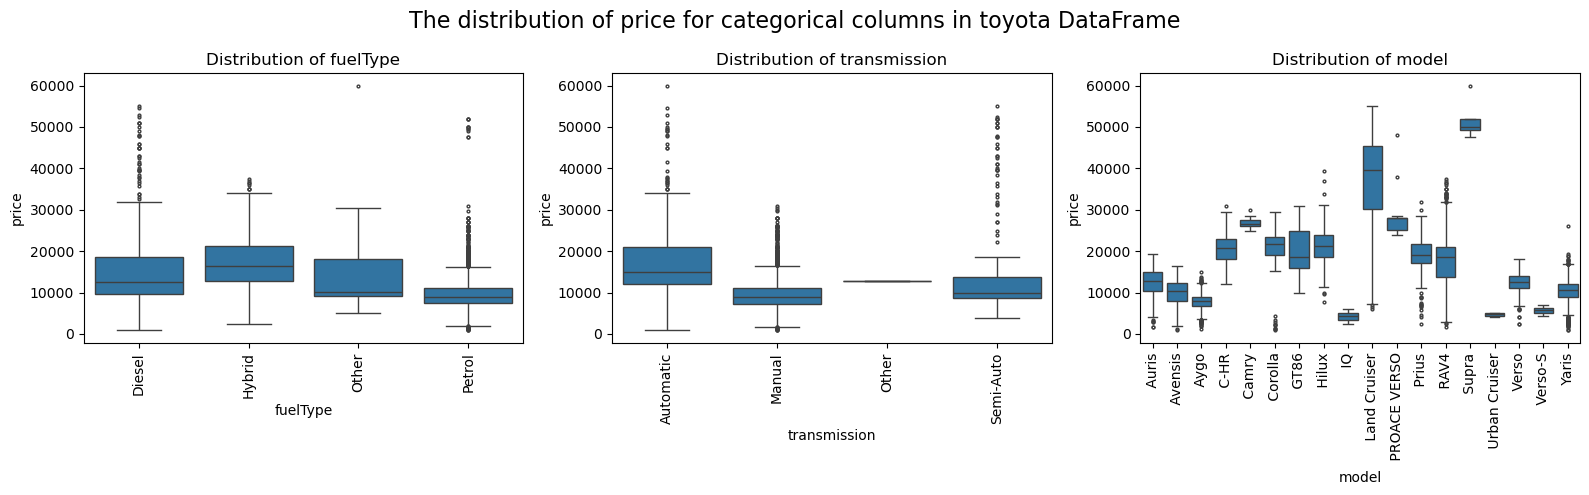

In [6]:
## visualize the relationships between the price column and the categorical columns
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Relationships between Price and Categorical Features', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Define the features to plot
features = ['fuelType', 'transmission', 'model']
titles = ['Price vs FuelType', 'Price vs Transmission', 'Price vs Model']

# Create each plot
for idx, (feature, title) in enumerate(zip(features, titles)):
    sns.histplot(
        x='price_log',
        data=toyota_df_cleaned,
        ax=axes[idx],
        hue=feature
    )
    axes[idx].set_title(title)
    # Get the legend and modify it AFTER plotting
    legend = axes[idx].get_legend()
    if legend:
        legend.set_loc('upper left')
        legend.set_frame_on(True)
        for text in legend.get_texts():
            text.set_fontsize(6)

plt.tight_layout()
plt.show()

# Look at price distribution over the categorical predictors
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('The distribution of price for categorical columns in toyota DataFrame', fontsize=16)

for i, col in enumerate(features):
    sns.boxplot(x=col, y='price', data=toyota_df_cleaned, ax=axes[i], fliersize=2)
    labels = axes[i].get_xticklabels()
    axes[i].set_xticklabels(labels, rotation=90)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


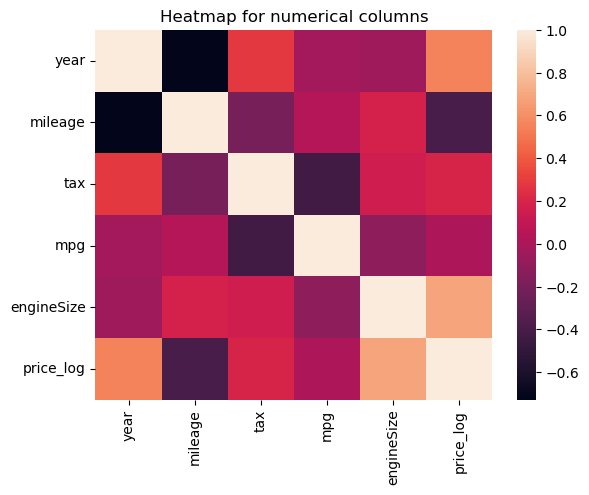

In [7]:
# corr matrix between numeric columns
num_cols = toyota_df_cleaned.select_dtypes(include=np.number).drop('price', axis=1)
sns.heatmap(num_cols.corr())
plt.title('Heatmap for numerical columns')
plt.show()

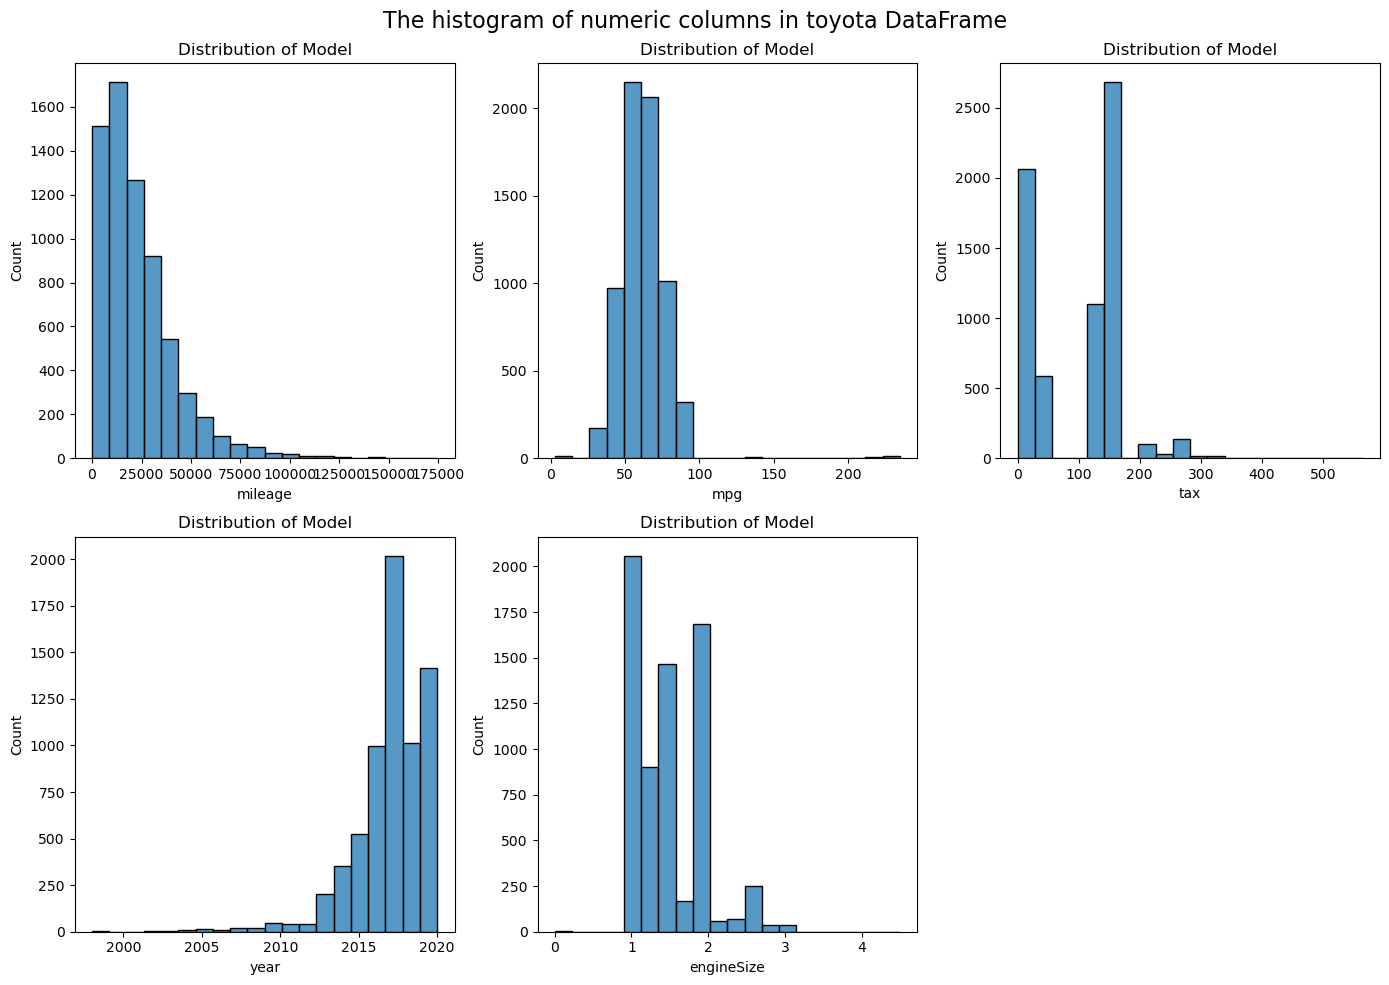

In [8]:
## visualize the numerical columns
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
fig.suptitle('The histogram of numeric columns in toyota DataFrame', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Define the features to plot
features = ['mileage', 'mpg', 'tax', 'year', 'engineSize']

# Create each plot
for i, col in enumerate(features):
    sns.histplot(toyota_df_cleaned[col], ax=axes[i], kde=False, bins=20)
    axes[i].set_title(f'Distribution of {feature.capitalize()}')

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

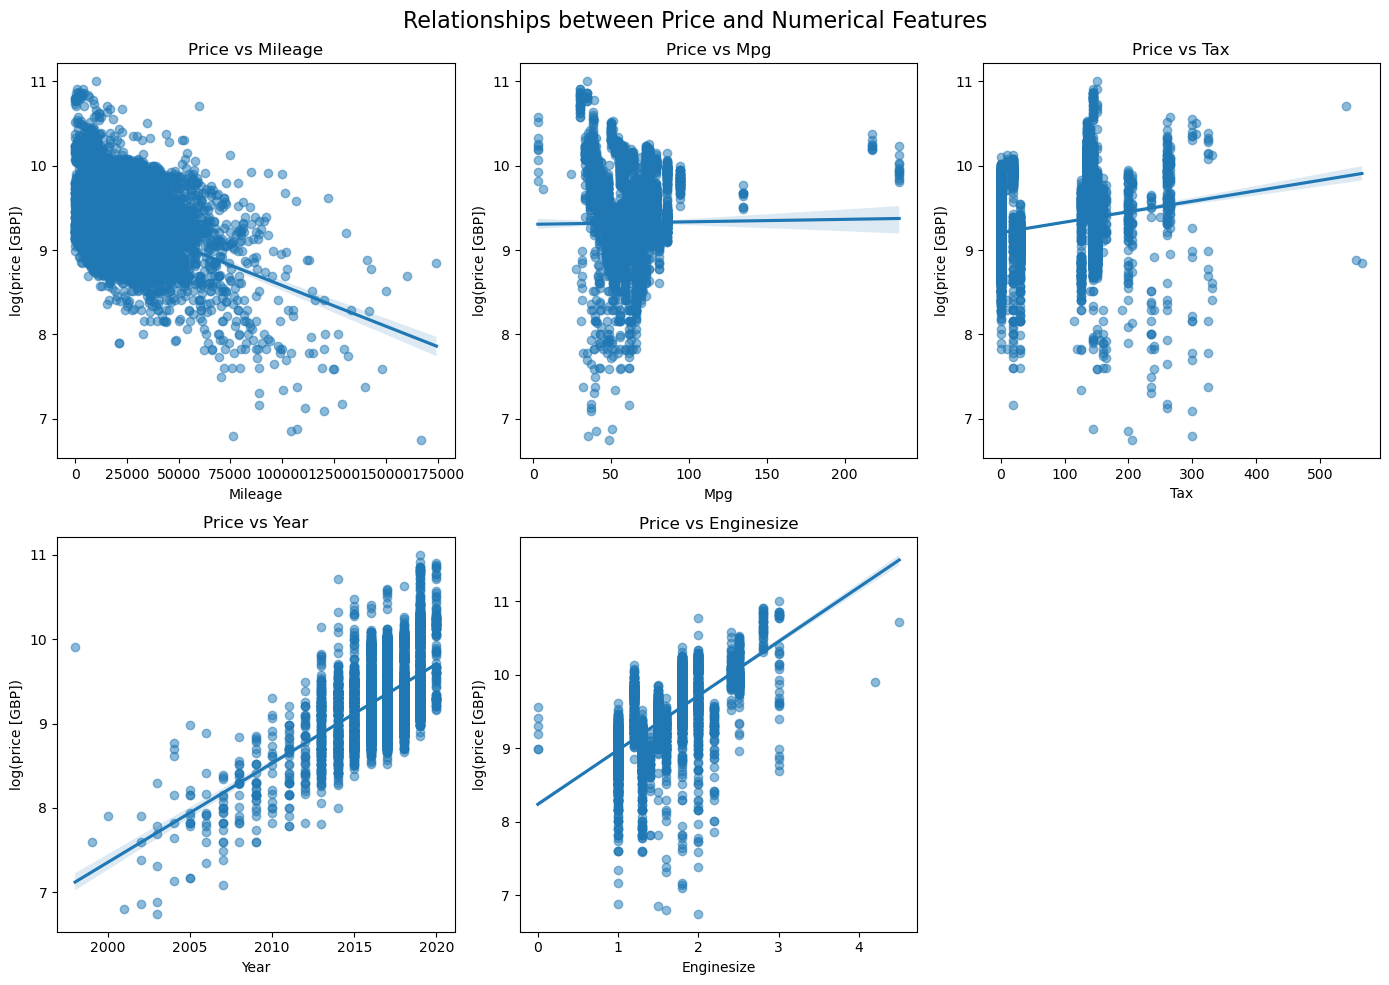

In [9]:
## visualize the relationships between the price column and the numerical columns
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
fig.suptitle('Relationships between Price and Numerical Features', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Define the features to plot
features = ['mileage', 'mpg', 'tax', 'year', 'engineSize']
titles = ['Price vs Mileage', 'Price vs MPG', 'Price vs Tax', 'Price vs Year', 'Price vs Engine Size']

# Create each plot
for idx, feature in enumerate(features):
    sns.regplot(
        x=feature,
        y='price_log',
        data=toyota_df_cleaned,
        ax=axes[idx],
        scatter_kws={'alpha': 0.5}
    )
    axes[idx].set_title(f'Price vs {feature.capitalize()}')
    axes[idx].set_ylabel('log(price [GBP])')
    axes[idx].set_xlabel(feature.capitalize())

# Hide unused subplots if any
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()

In [10]:
## preprocessing pipeline
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# setting parameters
random_state_ = 1234
which_score = 'neg_mean_squared_error'

# making X and y
X = toyota_df_cleaned.drop(['price', 'price_log'], axis=1)
y = toyota_df_cleaned['price_log']

# splitting to train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state=random_state_,
    shuffle=True
)

# creating KFold for all models
kf = KFold(n_splits=10, random_state=random_state_, shuffle=True)

# creating preprocessing part of the pipeline
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
nominal_categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first')) 
])

# Combine all transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, nominal_categorical_features)
    ],
    remainder='passthrough' 
)

In [37]:
## function for evaluating the models
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

def model_scoring(model, X_test, y_test, model_name:str, scoring:str=which_score):
    """Calculate and return different scores for input models."""
    
    # 1. Scores for test data
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print_jupiter(f"r2_score of the model is: {r2}")
    
    mse = mean_squared_error(y_test, y_pred)
    print_jupiter(f"MSE of the model is: {mse}")
    
    rmse = root_mean_squared_error(y_test, y_pred)
    print_jupiter(f"RMSE of the model is: {rmse}")

    # 2. checking fit
    compare = False
    is_overfitting = False
    
    # Get the scoring method used
    if hasattr(model, 'scoring'):
        scoring_method = model.scoring
    else:
        print_jupiter("Warning: Cannot determine scoring method from model!")
        scoring_method = scoring
    
    if scoring_method in ['neg_mean_squared_error']:
        cv_score = -model.best_score_
        gap = cv_score - mse
        compare = True
    elif scoring_method == 'r2':
        gap = model.best_score_ - r2
        compare = True
    else:
        print_jupiter(f'Warning: cannot check overfitting for scoring={scoring_method}!')
        
    if compare:
        print('*'*60)
        print(f"CV Score: {model.best_score_:.4f}")
        print(f"Test Score: {r2 if scoring_method == 'r2' else mse:.4f}")
        print(f"CV vs Test Gap: {gap:.4f}")
        print('*'*60)
        
        if scoring_method == 'r2':
            # For R², CV should be close to test (higher is better)
            if gap > 0.1:
                print_jupiter("Warning: Possible overfitting!")
                is_overfitting = True
            elif gap < -0.05:
                print_jupiter("Warning: Test score higher than CV - check for data leakage!")
        else: 
            # For MSE, lower is better, so reverse the logic
            if gap < -0.1:
                print_jupiter("Warning: Possible overfitting!")
                is_overfitting = True
            
    return r2, mse, rmse, is_overfitting
    

In [12]:
# visualizer function
# Libs
from sklearn.model_selection import learning_curve, KFold

def learning_curve_automated(base_estimator, X_train, y_train, model_name: str, scoring='r2', random_state_=random_state_):
    """Visualize the learning curve of the input regression model."""

    # Use KFold for regression (not StratifiedKFold)
    kf_lc = KFold(n_splits=2, shuffle=True, random_state=random_state_)
    
    train_sizes, train_scores, val_scores = learning_curve(
        base_estimator, 
        X_train, 
        y_train, 
        cv=kf_lc, 
        scoring=scoring, 
        n_jobs=-1,
        train_sizes=np.linspace(0.1, .9, 3)
    )
    
    # Calculate means and standard deviations
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_mean = val_scores.mean(axis=1)
    val_std = val_scores.std(axis=1)
    
    plt.figure(figsize=(10, 6))
    
    # Plot with confidence intervals
    plt.plot(train_sizes, train_mean, label='Train Score', marker='o')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
    
    plt.plot(train_sizes, val_mean, label='CV Score', marker='o')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15)
    
    plt.xlabel('Training Size')
    plt.ylabel(f'{scoring.upper()}')
    plt.title(f'Learning Curve -- {model_name}')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

In [55]:
# 10% checker fucntion
def ten_checker(model, X_test, y_test, model_name: str):
    """Calculate the percentage of predictions within 10% of actual data."""
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Create a NEW dataframe (don't modify X_test)
    error_df = pd.DataFrame({
        'Predicted_price': np.round(np.exp(y_pred), 0),
        'Price': np.round(np.exp(y_test.values), 0)
    })
    
    # Calculate percentage difference
    error_df['Diff'] = (error_df['Predicted_price'] - error_df['Price']) / error_df['Price']
    
    # Visualization
    plt.figure(figsize=(10, 6))
    plt.hist(error_df['Diff'], bins=50, alpha=0.7, edgecolor='black')
    plt.axvline(x=0.1, color='r', linestyle='--', linewidth=2, label='± 10% range')
    plt.axvline(x=-0.1, color='r', linestyle='--', linewidth=2)
    plt.axvline(x=0.3, color='b', linestyle='--', linewidth=2, label='± 30% range')
    plt.axvline(x=-0.3, color='b', linestyle='--', linewidth=2)
    plt.axvline(x=0, color='green', linestyle='-', linewidth=3, alpha=0.5, label='Perfect prediction')
    plt.title(f'Percentage Difference between Actual and Predicted Prices\n{model_name}')
    plt.xlabel('Percentage Difference')
    plt.xlim(-1,1)
    plt.ylim(0,1000)
    plt.ylabel('Count')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Calculate percentage within 10% (using pandas boolean indexing)
    def with_x_pct(target):
        """Calculate the percentage of the data within the provided margin."""
        within_ = (error_df['Diff'].abs() <= target).sum()
        pct = within_ / len(error_df)
        print_jupiter(f'Percentage of predictions within +/- {target*100}% range: {pct:.2%}')
        return pct
    within_10pct = with_x_pct(.1)
    within_30pct = with_x_pct(.3)
    return error_df, within_10pct, within_30pct

In [14]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Setting up and fitting a Logistic regression model
pipe_rf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('rf', RandomForestRegressor())
])

params_rf = {
    'rf__max_depth':np.arange(1,10,1),
    'rf__min_samples_leaf':np.arange(.01,.4,.05),
    'rf__n_estimators':np.arange(100,210,10)
}

grid_rf = RandomizedSearchCV(
    pipe_rf, 
    params_rf, 
    cv=kf, 
    scoring=which_score,  
    n_jobs=-1,
    refit=True,
    return_train_score=True,
    n_iter=100
)

grid_rf = grid_rf.fit(X_train, y_train)

In [39]:
# scoring and visualization rf
results_rf = model_scoring(grid_rf, X_test, y_test, model_name='Random Forest Regressor')

************************************************************
r2_score of the model is: 0.8689033116984524
************************************************************
************************************************************
MSE of the model is: 0.030635405402769395
************************************************************
************************************************************
RMSE of the model is: 0.17502972719732324
************************************************************
************************************************************
CV Score: -0.0235
Test Score: 0.0306
CV vs Test Gap: -0.0072
************************************************************


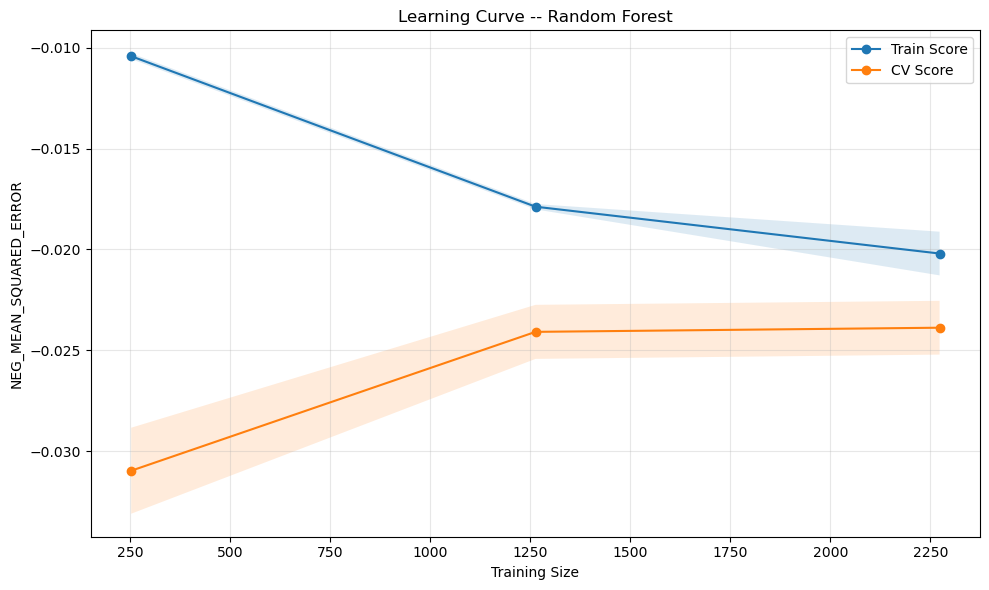

In [30]:
# scoring and visualization rf
learning_curve_automated(grid_rf, X_train, y_train, 'Random Forest', scoring=which_score)

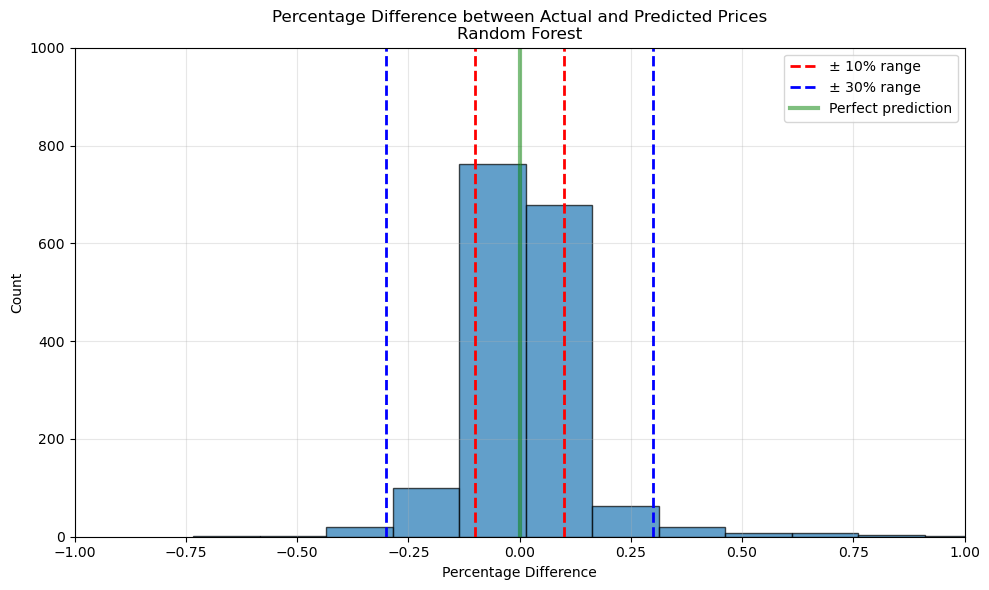

************************************************************
Percentage of predictions within +/- 10.0% range: 70.15%
************************************************************
************************************************************
Percentage of predictions within +/- 30.0% range: 95.37%
************************************************************


In [56]:
# scoring and visualization rf
tenpct_rf = ten_checker(grid_rf, X_test, y_test, 'Random Forest')

In [16]:
# Stochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Setting up and fitting a Logistic regression model
pipe_gb = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('gb', GradientBoostingRegressor())
])

params_gb = {
    'gb__max_depth':np.arange(1,10,1),
    'gb__min_samples_leaf':np.arange(.01,.4,.05),
    'gb__n_estimators':np.arange(100,210,10),
    'gb__subsample':np.arange(.1,.9,.1),
    'gb__max_features':np.arange(.5,1,.1)
}

grid_gb = RandomizedSearchCV(
    pipe_gb, 
    params_gb, 
    cv=kf, 
    scoring=which_score,
    n_jobs=-1,
    refit=True,
    return_train_score=True,
    n_iter=100
)

grid_gb = grid_gb.fit(X_train, y_train)


In [38]:
# scoring and visualization gb
results_gb = model_scoring(grid_gb, X_test, y_test, model_name='Stochastic Gradient Boosting')

************************************************************
r2_score of the model is: 0.9484422964600369
************************************************************
************************************************************
MSE of the model is: 0.012048291761188015
************************************************************
************************************************************
RMSE of the model is: 0.1097647109101464
************************************************************
************************************************************
CV Score: -0.0102
Test Score: 0.0120
CV vs Test Gap: -0.0019
************************************************************


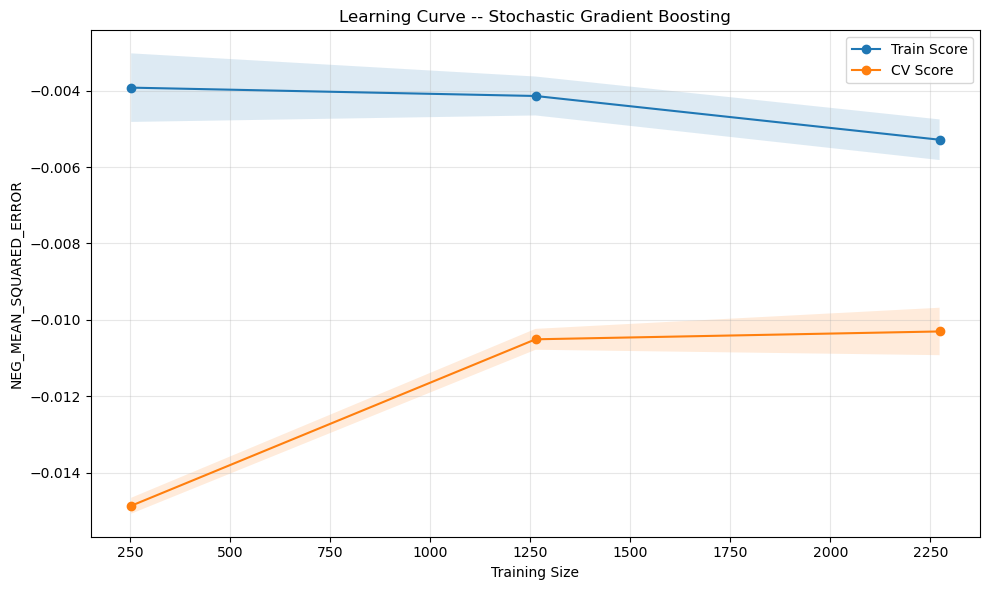

In [33]:
# scoring and visualization gb
learning_curve_automated(grid_gb, X_train, y_train, 'Stochastic Gradient Boosting', scoring=which_score)

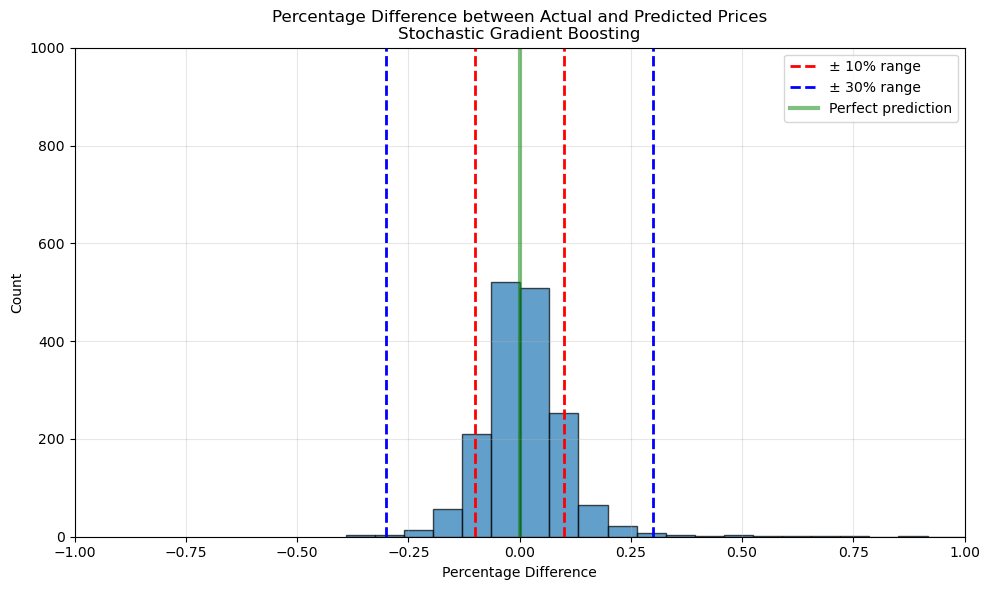

************************************************************
Percentage of predictions within +/- 10.0% range: 79.58%
************************************************************
************************************************************
Percentage of predictions within +/- 30.0% range: 98.16%
************************************************************


In [57]:
# scoring and visualization gb
tenpct_gb = ten_checker(grid_gb, X_test, y_test, 'Stochastic Gradient Boosting')

In [42]:
# select best model
models = {
    'RandomForestRegressor': (grid_rf, results_rf, tenpct_rf),
    'GradientBoostingRegressor': (grid_gb, results_gb, tenpct_gb)
}

best_model_name = None
best_score = -float('inf')

for model_name, (grid_obj, results, tenpct) in models.items():
    r2, mse, rmse, is_overfitting = results
    tenpct = tenpct
    if which_score == 'r2':
        score=r2
    elif which_score == 'neg_mean_squared_error':
        score=mse
        
    # Select best non-overfitting model
    if score > best_score and not is_overfitting:
        best_model_name = model_name
        best_score = grid_obj.best_score_

if best_model_name:
    grid_best, results_best, tenpct_best = models[best_model_name]
    
    print_jupiter(f"The best model: {best_model_name}")
    print(f"Best params:")
    for key, val in grid_best.best_params_.items():
        print(f"{key}: {val}")
    print(f"\nCV score: {grid_best.best_score_:.4f}\n")
    print(f"\nTest Set Performance:")
    print(f"  r2:  {results_best[0]:.4f}")
    print(f"  MSE: {results_best[1]:.4f}")
    print(f"  RMSE:    {results_best[2]:.4f}")
    print(f"  within %10 of actual data:  {tenpct_best[1]:.2%}")
    print(f"  within %10 of actual data:  {tenpct_best[2]:.2%}")
else:
    print("No model met the selection criteria (due to overfitting)")

************************************************************
The best model: GradientBoostingRegressor
************************************************************
Best params:
gb__subsample: 0.6000000000000001
gb__n_estimators: 140
gb__min_samples_leaf: 0.01
gb__max_features: 0.5
gb__max_depth: 6

CV score: -0.0102


Test Set Performance:
  r2:  0.9484
  MSE: 0.0120
  RMSE:    0.1098
  within %10 of actual data:  79.58%
  within %10 of actual data:  98.16%
